In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/gdrive/My Drive/YAZ20411/Customer_Churn_Analysis.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
data.shape

(10000, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction_Score  10000 non-null  int64  
 16  Card_

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Point_Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction_Score    0
Card_Type             0
Point_Earned          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

# **Explorotory Data Analysis**

In [ ]:
data['Exited_label'] = data['Exited'].replace({1: 'Churned',
                                               0: 'Retained'})

Text(0.5, 1.0, 'Banka Müşteri Kaybı')

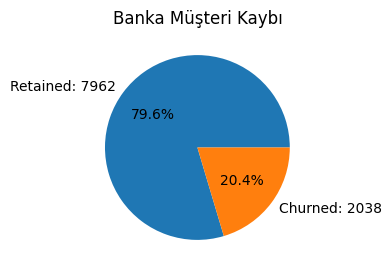

In [ ]:
fig = plt.figure(figsize=(3,3))

churned = data['Exited_label'].value_counts()

plt.pie(churned, labels = [f'{churned.index[0]}: {churned.values[0]}',
                           f'{churned.index[1]}: {churned.values[1]}'], autopct='%1.1f%%')
plt.title('Banka Müşteri Kaybı')

In [ ]:
data['Card_Type'].value_counts().sort_values()

PLATINUM    2495
SILVER      2496
GOLD        2502
DIAMOND     2507
Name: Card_Type, dtype: int64

In [ ]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction_Score  10000 non-null  int64  
 16  Card_

In [ ]:
numerical_features = data[['CreditScore', 'Age','Tenure','Balance','NumOfProducts',
                          'HasCrCard','IsActiveMember','EstimatedSalary','Exited',
                          'Complain', 'Point_Earned']]

corr_matrix = numerical_features.corr()

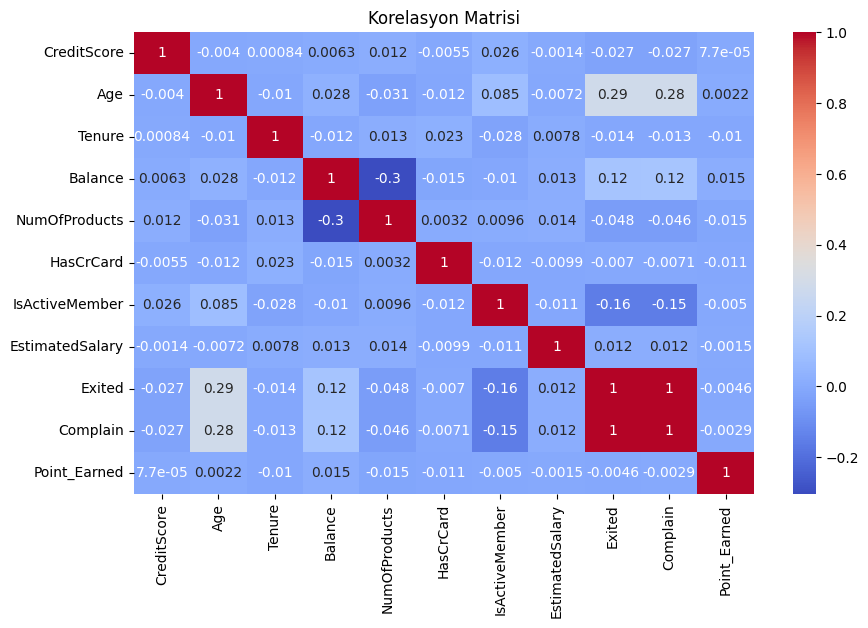

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction_Score  10000 non-null  int64  
 16  Card_

In [ ]:
data = data.drop(['RowNumber','CustomerId', 'Surname', 'Tenure', 'Satisfaction_Score', 'Card_Type','Point_Earned','Exited_label'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  Complain         10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
data['Geography'] = data['Geography'].astype('category')
data['Gender'] = data['Gender'].astype('category')

In [ ]:
encoded_data = pd.get_dummies(data, columns=['Geography','Gender'], drop_first=True)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain
0,619,France,Female,42,0.00,1,1,1,101348.88,1,1
1,608,Spain,Female,41,83807.86,1,0,1,112542.58,0,1
2,502,France,Female,42,159660.80,3,1,0,113931.57,1,1
3,699,France,Female,39,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,125510.82,1,1,1,79084.10,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

In [ ]:
selected_features = encoded_data.drop(['Exited'], axis=1) #Eğitilecek veriler
target_variables = encoded_data['Exited'] #Tahmin edilecek sütün

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, target_variables, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **Logistic Regression Grid Seach Hiperparametre Optimizasyonu**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression model
lreg_model = LogisticRegression()

'''
'penalty': Bu parametre, ceza fonksiyonunu belirler, yani modelin aşırı uydurmayı kontrol etmek için kullanılır.
     'l1': L1 ceza fonksiyonunu kullanır (Lasso regularization). L1 ceza fonksiyonu, modelin katsayılarının mutlak değerlerinin toplamını kullanır.
          Bu, bazı katsayıları tamamen sıfıra indirgeme eğilimindedir. L1 ceza fonksiyonu, özellik seçimi (feature selection) için etkilidir.
          Çünkü bazı özelliklerin katsayıları sıfıra indirilebilir, bu da modelin daha basitleştirilmesine ve daha az önemsiz özelliğe sahip olmasına neden olabilir.
      'l2': L2 ceza fonksiyonunu kullanır (Ridge regularization). L2 ceza fonksiyonu, modelin katsayılarının karelerinin toplamını kullanır.
         Bu, tüm katsayıları küçültme eğilimindedir, ancak tam olarak sıfıra indirme eğiliminde değildir. L2 ceza fonksiyonu, özellikler arasındaki çoklu doğrusallığı azaltabilir ve
         genellikle aşırı uydurmayı önleme konusunda etkilidir.
'elasticnet': L1 ve L2 ceza fonksiyonlarının bir karışımını kullanır.
'none': Ceza uygulanmaz, yani doğrusal regresyona benzer.
'C': C, ceza katsayısıdır ve sınıflandırma hatasını kontrol eder. Küçük bir C değeri, daha fazla ceza ve daha genelleştirilmiş bir model anlamına gelir.
     Tersine, büyük bir C değeri, daha az ceza ve eğitim verilerine daha çok uyan bir model anlamına gelir.
'solver': Bu parametre, optimize edici algoritmayı belirtir.
   'newton-cg': Newton-Raphson yöntemini kullanır.
    'lbfgs': Limited-memory Broyden-Fletcher-Goldfarb-Shanno yöntemini kullanır.
    'liblinear': LIBLINEAR kütüphanesini temel alan bir döngü çözücüsüdür.
    'sag': Stochastic Average Gradient Descent yöntemini kullanır.
'max_iter': Optimize edici algoritmanın maksimum iterasyon sayısını belirler. Bu, modelin eğitimini sonlandırmak için bir sınır koyar.
'''

# Parametre ızgarası
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'sag'],
    'max_iter': [20, 30, 40, 50]
}

# Grid Search
grid_search = GridSearchCV(estimator=lreg_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [20, 30, 40, 50],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'sag']},
             scoring='accuracy')

In [ ]:
# En iyi parametreleri ve en iyi skoru görüntüleme
print("En iyi parametreler: ", grid_search.best_params_)
print("En iyi skor: ", grid_search.best_score_)

En iyi parametreler:  {'C': 0.01, 'max_iter': 20, 'penalty': 'l1', 'solver': 'liblinear'}
En iyi skor:  0.9985000000000002


# **Logistic Regression Uygulaması**

In [ ]:
lreg_model = LogisticRegression(C=0.01, max_iter=20, penalty='l1', solver='liblinear' )
lreg_model.fit(X_train, y_train)
lreg_prediction = lreg_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, lreg_prediction )
precision = precision_score(y_test, lreg_prediction, average='weighted')
recall = recall_score(y_test, lreg_prediction, average='weighted' )
f1_score = f1_score(y_test, lreg_prediction, average='weighted' )

In [ ]:
print("Accuracy of LogReg: ", accuracy)
print("Precision of LogReg: ", precision)
print("Recall of LogReg:", recall)
print("F1 Score of LogReg :", f1_score)

Accuracy of LogReg:  0.999
Precision of LogReg:  0.999
Recall of LogReg: 0.999
F1 Score of LogReg : 0.999


In [ ]:
from sklearn.metrics import classification_report

labels= ['Churned','Retained']

print(classification_report(y_test, lreg_prediction, target_names=labels))


              precision    recall  f1-score   support

     Churned       1.00      1.00      1.00      1607
    Retained       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# **Logistic Regression Random Seach Hiperparametre Optimizasyonu**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Logistic Regression model
lreg_model = LogisticRegression()

# Parametre dağılımları
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [20, 30, 40, 50]
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=lreg_model, param_distributions=param_dist, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [20, 30, 40, 50],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [ ]:
# En iyi parametreleri ve en iyi skoru görüntüleme
print("En iyi parametreler: ", random_search.best_params_)
print("En iyi skor: ", random_search.best_score_)

En iyi parametreler:  {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 40, 'C': 100}
En iyi skor:  0.9985000000000002


# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
# SVM model
svm_model = SVC()

'''
'C': Bu parametre, düzenleme (regularization) katsayısını kontrol eder. C değeri büyüdükçe, düzenleme azalır ve model, eğitim verisine daha fazla uymaya başlar.
      Ancak çok büyük bir C değeri, aşırı uydurmayı (overfitting) artırabilir. Bu parametre genellikle doğrusal olmayan problemlerde kullanılır.
'kernel': SVM'nin çekirdek fonksiyonunu belirler. Çekirdek fonksiyonu, veriyi yüksek boyutlu özellik uzayına taşımak için kullanılır ve özellikle doğrusal olarak ayrılamayan veri setlerinde kullanılır.
    'linear': Doğrusal çekirdek.
     'rbf' (radial basis function): Radyal temel fonksiyon çekirdeği.
     'poly': Polinom çekirdeği.
     'sigmoid': Sigmoid çekirdeği
'gamma': Çekirdek katsayısını kontrol eder. Küçük bir gamma değeri, geniş bir etki alanına sahip olacakken, büyük bir gamma değeri, etki alanını sınırlayabilir ve daha fazla örneği dikkate alır.
'scale': Varsayılan olarak 1/(n_features * X.var()) olarak hesaplanan gamma değeri. var() varyans değeri.  Varyans, bir rastgele değişkenin,
                                                  örneklem ya da popülasyon içindeki değerlerin ortalamasından ne kadar sapma eğiliminde olduğunu ölçen bir istatistiksel ölçüdür.

'''

# Parametre ızgarası
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 0.1, 1],
    'degree': [2, 3, 4],
}

# Grid Search
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_svm.fit(X_train, y_train)

In [ ]:
# En iyi parametreleri ve en iyi skoru görüntüleme
print("En iyi parametreler: ", grid_search_svm.best_params_)
print("En iyi skor: ", grid_search_svm.best_score_)

# **Decision Tree Grid Seach Hiperparametre Optimizasyonu**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Decision Tree model
dt_model = DecisionTreeClassifier()
'''
'criterion': Karar ağacının bölme kararlarını yaparken kullanılan kriteri belirler. İki yaygın kriter şunlardır:
'splitter': Karar ağacının bölme stratejisini belirler. İki seçenek vardır:
     'best': En iyi bölme stratejisini seçer.
      'random': Rastgele bölme stratejisini kullanır.
'max_depth': Ağacın maksimum derinliğini sınırlar. None olarak ayarlanırsa, düğümler artık bölünme potansiyeline kadar bölünmez.
'min_samples_split': Bir iç düğümü bölme kararı vermeden önce gerekli olan minimum örnek sayısını belirtir. Bu, ağacın daha fazla bölünmeden önce bir düğümde ne kadar veri olması gerektiğini kontrol eder.
'min_samples_leaf': Bir yaprak düğümü oluşturmak için gereken minimum örnek sayısını belirtir. Bu, her bir terminal düğümünün (yaprak düğümü) en az ne kadar örneği olması gerektiğini kontrol eder.
'max_features': Her düğümdeki bölme için kullanılacak maksimum özellik sayısını belirtir.
None: Tüm özellikleri kullan.
    'sqrt': Karekök kadar özellik kullan.
    'log2': Logaritma tabanında 2 kadar özellik kullan.
'''
# Parametre ızgarası
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid Search
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
# En iyi parametreleri ve en iyi skoru görüntüleme
print("En iyi parametreler: ", grid_search_dt.best_params_)
print("En iyi skor: ", grid_search_dt.best_score_)

En iyi parametreler:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
En iyi skor:  0.9985000000000002


# **Decision Tree Random Seach Hiperparametre Optimizasyonu**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Decision Tree model
dt_model = DecisionTreeClassifier()

# Parametre dağılımları
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Randomized Search
random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist, scoring='accuracy', cv=5, random_state=42)
random_search_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy')

In [ ]:
# En iyi parametreleri ve en iyi skoru görüntüleme
print("En iyi parametreler: ", random_search_dt.best_params_)
print("En iyi skor: ", random_search_dt.best_score_)

En iyi parametreler:  {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 40, 'criterion': 'gini'}
En iyi skor:  0.9985000000000002


# **KNN Grid Seach Hiperparametre Optimizasyonu**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN model
knn_model = KNeighborsClassifier()
'''
'auto': Bu, KNN algoritması için en uygun algoritmayı otomatik olarak seçmesini sağlar. Genellikle, veri kümenizin boyutuna ve yapısına bağlı olarak bu otomatik seçim yapılır.

'ball_tree': Bu, küresel bir ağaç yapısını kullanarak komşu aramayı gerçekleştirir. Küresel ağaç yapısı, veri kümesini önce bir ağaç yapısına dönüştürür ve ardından sorguları bu ağaç yapısı üzerinde hızlı bir şekilde gerçekleştirir.

'kd_tree': Bu, çok boyutlu veri kümesini işlemek için kullanılan bir diğer ağaç yapısıdır. K-d tree, özellikle düşük boyutlu veri kümeleri için etkilidir.

'brute': Bu, en basit KNN algoritmasıdır. Brute-force (kaba kuvvet) yöntemini kullanarak, her bir sorgu için tüm veri kümesini tarar ve en yakın komşuları bulur.
'''

# Parametre ızgarası
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski','cosine','chebyshev']
}

# Grid Search
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 493, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.10/dist-packages/sklear

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'cosine', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# En iyi parametreleri ve en iyi skoru görüntüleme
print("En iyi parametreler: ", grid_search_knn.best_params_)
print("En iyi skor: ", grid_search_knn.best_score_)

En iyi parametreler:  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
En iyi skor:  0.783


# **KNN Random Seach Hiperparametre Optimizasyonu**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# KNN model
knn_model = KNeighborsClassifier()

# Parametre dağılımları
param_dist = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski','cosine','chebyshev']
}

# Randomized Search
random_search_knn = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, random_state=42)
random_search_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 493, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.10/dist-packages/sklearn

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski', 'cosine',
                                                   'chebyshev'],
                                        'n_neighbors': [3, 5, 7, 9],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [ ]:
# En iyi parametreleri ve en iyi skoru görüntüleme
print("En iyi parametreler: ", random_search_knn.best_params_)
print("En iyi skor: ", random_search_knn.best_score_)

En iyi parametreler:  {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
En iyi skor:  0.783


# **NB Grid Seach Hiperparametre Optimizasyonu**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Naive Bayes model
nb_model = GaussianNB()

#Prior: Sınıflandırma problemindeki sınıfların önceden belirlenmiş olasılıklarını ifade eder. Sınıflandırıcı, her bir sınıf için varsayılan olarak eşit olasılıkları kullanabilir.
#Ancak, eğer belirli bir sınıfın veri kümesinde diğerlerinden daha yaygın olduğunu biliyorsanız, bu bilgiyi Prior parametresi aracılığıyla modele iletebilirsiniz.
#Var_smoothing (Variance Smoothing): Naive Bayes sınıflandırıcıları, özellikler arasındaki bağımsızlık varsayımı nedeniyle, eğer bir özellik belirli bir sınıfta hiç görülmemişse, bu durumda olasılıkları sıfır olacaktır.
#Bu durum, modelin genelleme yeteneğini azaltabilir. Var_smoothing parametresi, bu tür durumları ele almak için kullanılır. Bu parametre, modeldeki her özellik için küçük bir varyans ekleyerek sıfıra bölme hatasını önler. Bu, daha düzgün olasılık tahminleri elde etmeye yardımcı olabilir ve modelin daha iyi genelleme yapmasına katkı sağlayabilir.
'''
Örneğin, "priors" parametresine verilebilecek bir liste şu şekilde tanımlanabilir:
[None]: Varsayılan olarak, Naive Bayes sınıflandırıcısı tüm sınıfların başlangıç olasılıklarını eşit olarak kabul eder. Yani, bu durumda tüm sınıfların başlangıç olasılıkları eşit olacaktır.
[0.5, 0.5]: İki sınıfın başlangıç olasılıklarını belirtir. Örneğin, iki sınıf varsa ve bu sınıfların başlangıç olasılıklarını eşit olarak kabul etmek istiyorsanız, [0.5, 0.5] kullanabilirsiniz.
[0.3, 0.7]: İki sınıfın başlangıç olasılıklarını belirtir, ancak bu sefer sınıflar arasında farklı bir olasılık dağılımı belirlenmiştir. İlk sınıfın başlangıç olasılığı 0.3, ikinci sınıfın başlangıç olasılığı ise 0.7'dir.
[0.7, 0.3]: Bu da [0.3, 0.7]'nin tersidir. İlk sınıfın başlangıç olasılığı 0.7, ikinci sınıfın başlangıç olasılığı ise 0.3'tür.
'''

'''
verilen [1e-9, 1e-6, 1e-12] değerleri şu anlamlara gelmektedir.
1e-9: Çok küçük bir varyans ekler. Bu, modelin özellikleri daha fazla düzenlemesini sağlar ve eğer bir özellik belirli bir sınıfta hiç görülmemişse, bu durumda olasılıkları sıfır olmayacak, ancak çok küçük bir değere yakın olacaktır.
1e-6: Orta büyüklükte bir varyans ekler. Bu, orta derecede düzenleme yapar ve modelin olasılıkları düzenlemesine yardımcı olur.
1e-12: Çok küçük bir varyans ekler. Bu durum, daha güçlü bir düzenleme sağlar, ancak aynı zamanda modelin eğitim verilerine daha fazla uymasını sınırlayabilir.
'''
# Parametre ızgarası
param_grid = {
      'var_smoothing': [1e-9, 1e-6, 1e-12],
      'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]]

}

# Grid Search
grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]],
                         'var_smoothing': [1e-09, 1e-06, 1e-12]},
             scoring='accuracy')

In [ ]:
# En iyi parametreleri ve en iyi skoru görüntüleme
print("En iyi parametreler: ", grid_search_nb.best_params_)
print("En iyi skor: ", grid_search_nb.best_score_)

En iyi parametreler:  {'priors': None, 'var_smoothing': 1e-12}
En iyi skor:  0.9985000000000002


# **NB Random Seach Hiperparametre Optimizasyonu**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

# Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Parametre dağılımları
param_dist = {
    'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]],
    'var_smoothing': [1e-9, 1e-6, 1e-12],
}

# Randomized Search
random_search_gnb = RandomizedSearchCV(estimator=gnb_model, param_distributions=param_dist, n_iter=4, scoring='accuracy', cv=5, random_state=42)
random_search_gnb.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=4,
                   param_distributions={'priors': [None, [0.5, 0.5], [0.3, 0.7],
                                                   [0.7, 0.3]],
                                        'var_smoothing': [1e-09, 1e-06, 1e-12]},
                   random_state=42, scoring='accuracy')

In [ ]:
# En iyi parametreleri ve en iyi skoru görüntüleme
print("En iyi parametreler: ", random_search_gnb.best_params_)
print("En iyi skor: ", random_search_gnb.best_score_)

En iyi parametreler:  {'var_smoothing': 1e-12, 'priors': [0.3, 0.7]}
En iyi skor:  0.9985000000000002
